In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import sklearn
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix

import kmapper as km
from kmapper.plotlyviz import *
from kmapper import jupyter
import networkx as nx


from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
def sphere_samples(d, m):
    """d: dimension of sphere, m: number of samples
    returns np array with m points normaly distributed
    """
    sample = np.random.normal(0,1,(m,d))
    normalize = lambda x: x/np.linalg.norm(x)
    normalized = np.apply_along_axis(normalize, 1, sample)
    return normalized

# Mapper of Circle

In [3]:
data = sphere_samples(2,500)

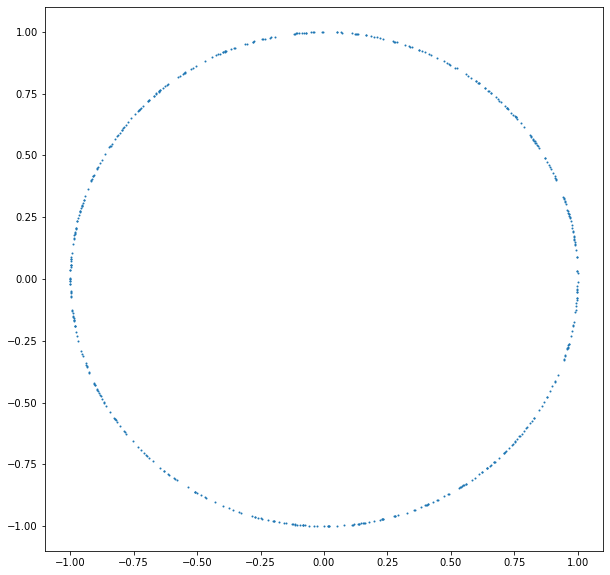

In [4]:
#plotting the data to get the alien
x = data[:,0]
y = data[:,1]
#z = data[:,2]

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

ax.scatter(x,y, s=1)
#ax.view_init(5, -70)
plt.show()

In [5]:
#initiate the mapper object
mapper = km.KeplerMapper(verbose = 0)

#define the filter
lens = mapper.fit_transform(data, projection = [0,1])

# Define the simplicial complex using different parameters. Note that
graph = mapper.map(lens,
                   data,
                   cover = km.Cover(n_cubes=5, perc_overlap=0.55),
                   clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                       random_state=3471))

# Visualize it
html = mapper.visualize(graph, 
                        color_values= data[:,1],
                        color_function_name = 'height',
                        node_color_function = ['median', 'max', 'average'], 
                        path_html="sphere.html",
                        title="Sphere")

# Inline display
jupyter.display(path_html="sphere.html")

/Users/camilomesa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# 4-dimensional sphere

In [7]:
fourd_sphere = sphere_samples(4,500)

In [12]:
#initiate the mapper object
mapper4d = km.KeplerMapper(verbose = 0)

#define the filter
lens4d = mapper.fit_transform(fourd_sphere, projection = [0,1])

# Define the simplicial complex using different parameters. Note that
graph4d = mapper.map(lens4d,
                   fourd_sphere,
                   cover = km.Cover(n_cubes=5, perc_overlap=0.55),
                   clusterer=sklearn.cluster.KMeans(n_clusters=2,
                                                       random_state=3471))

# Visualize it
html = mapper.visualize(graph4d, 
                        color_values= fourd_sphere[:,3],
                        color_function_name = 'height',
                        node_color_function = ['median', 'max', 'average'], 
                        path_html="4dsphere.html",
                        title="4dSphere")

# Inline display
jupyter.display(path_html="4dsphere.html")

/Users/camilomesa/opt/anaconda3/lib/python3.8/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")
